**本案例使用经典的 Auto MPG 数据集，构建了一个用来预测70年代末到80年代初汽车燃油效率的模型。我们将为该模型提供许多那个时期的汽车描述特征。包含：气缸数，排量，马力以及重量**

In [1]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.1.0


In [2]:
dataset_path=keras.utils.get_file("auto-mpg.data","http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\JL\\.keras\\datasets\\auto-mpg.data'

In [3]:
#'百公里油耗'，'汽缸'，'排量'，'马力'，'重量'，'加速'，'模型年份'，'原产地'
column_names=['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
print(column_names)

['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']


**原csv文件中最后一列是汽车型号，对数据分析没有影响，应该删除,可以看到该列以'\t'字符开始**

In [4]:
#处理之前的原文件
data=pd.read_csv('C:\\Users\\JL\\.keras\\datasets\\auto-mpg.data')
print(data)

    18.0   8   307.0      130.0      3504.      12.0   70  1\t"chevrolet chevelle malibu"
0    15.0   8   350.0      165.0      3693.      11...                                   
1    18.0   8   318.0      150.0      3436.      11...                                   
2    16.0   8   304.0      150.0      3433.      12...                                   
3    17.0   8   302.0      140.0      3449.      10...                                   
4    15.0   8   429.0      198.0      4341.      10...                                   
..                                                 ...                                   
392  27.0   4   140.0      86.00      2790.      15...                                   
393  44.0   4   97.00      52.00      2130.      24...                                   
394  32.0   4   135.0      84.00      2295.      11...                                   
395  28.0   4   120.0      79.00      2625.      18...                                   
396  31.0 

**read_csv函数可以将csv文件读入，返回一个DataFrame(二维数组）
**第一个参数是文件路径，
参数names:需要使用的列名列表，
   comment:指示不应分析行的其余部分,即删除'\t'之后的数据
   sep:scv文件的定界符，是空格
   skipinitialspace：跳过定界符后的空格

In [5]:
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

In [6]:
#print输出原始格式
print(raw_dataset)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4    

In [7]:
dataset = raw_dataset.copy()

In [8]:
#打印表格最后n行，默认为5行
dataset.tail(8)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


**DataFrame.isna():检测缺失值（na/nan)，缺失值的位置映射为TRUE**

In [9]:
#统计每列中na值的个数
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [10]:
#删除有缺失值的行
dataset = dataset.dropna()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

**DataFrame.pop()从Dataframe中删除某列，并返回该列的值**

In [11]:
origin=dataset.pop('Origin')

In [12]:
origin

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

**”Origin“代表产地，共三个值，转换成独热码
DataFrame[’列名‘]直接在原二维数组后加一列
**

In [13]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


**拆分数据集为一个训练集和一个测试集
DataFrame.sample():随机选取若干行
frac：抽取的比例random_state
random_state：随机数发生器种子，0表示不重复
train_dataset.index指训练集的行标签


In [14]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

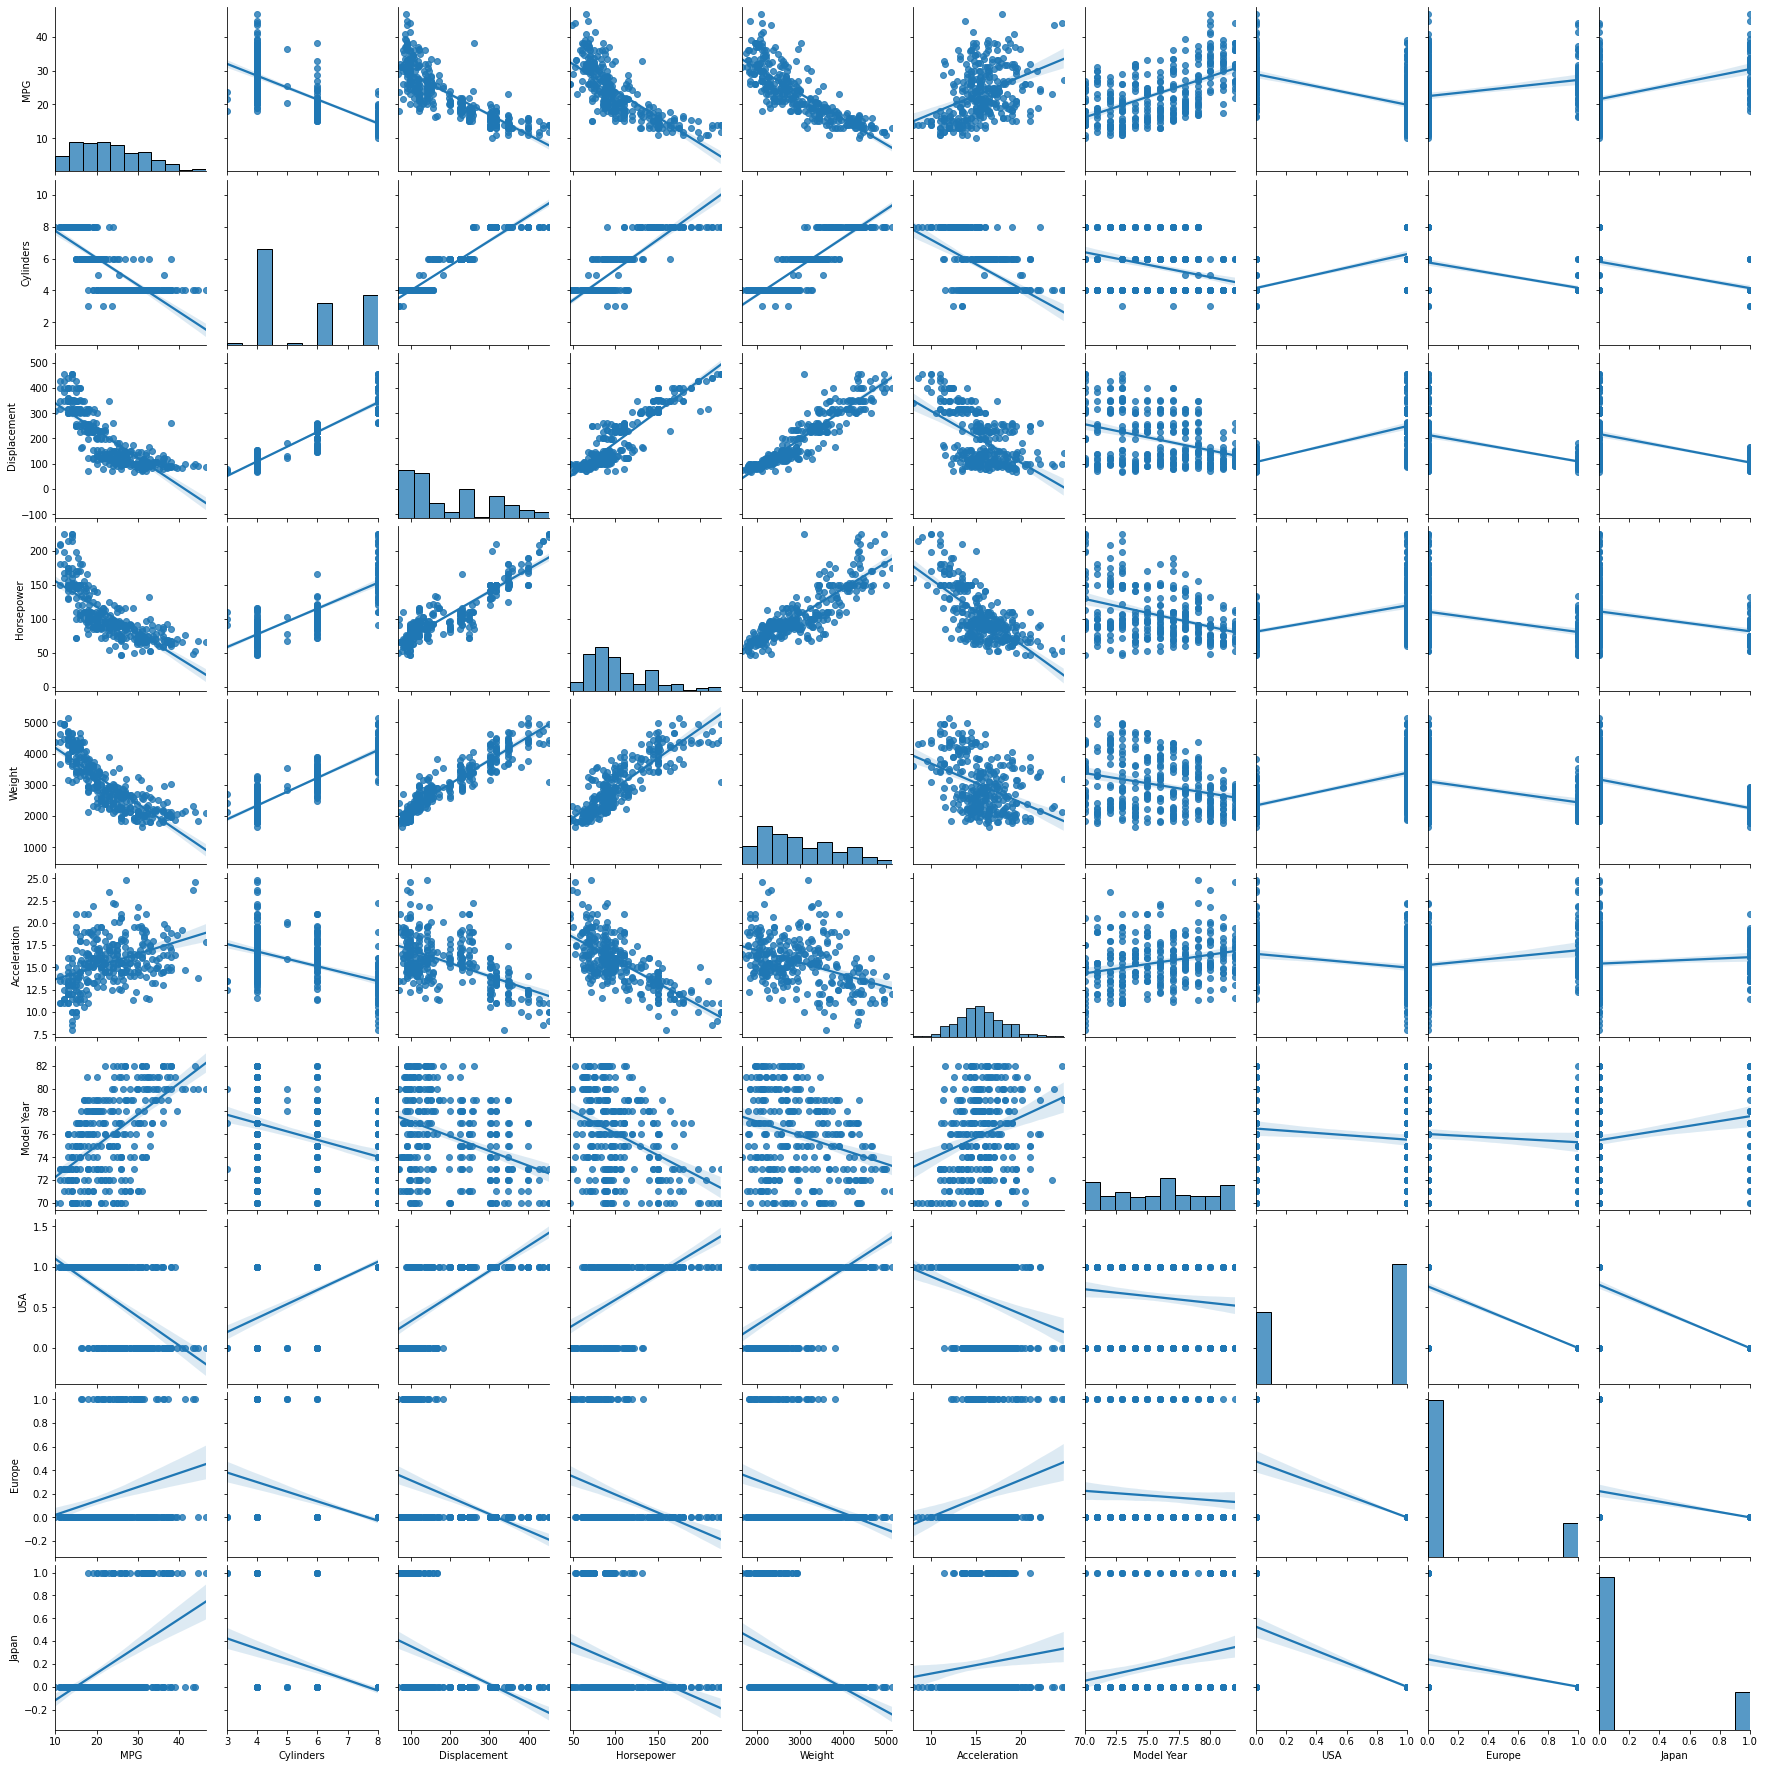

In [15]:
sns.pairplot(train_dataset[["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model Year","USA","Europe","Japan"]],kind="reg" ,diag_kind="hist")

In [16]:
#总体数据统计
#std:列数据的均方差
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [17]:
#分离标签
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [18]:
#数据归一化，使得训练模型更容易收敛
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [19]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


In [20]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [21]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.07128149],
       [ 0.15711857],
       [ 0.04159059],
       [ 0.05667715],
       [-0.31204814],
       [ 0.18647018],
       [-0.3228609 ],
       [ 0.41340268],
       [ 0.03795894],
       [-0.41151416]], dtype=float32)

fit()函数，返回一个 History 对象。其 History.history 属性是连续 epoch 训练损失和评估值，以及验证集损失和评估值的记录（如果适用）。

In [22]:
# 通过为每个完成的时期打印一个点来显示训练进度
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

#调用fit()函数训练模型
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [23]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,3.129570,1.119881,3.129571,8.493475,2.187725,8.493475,995
996,3.124099,1.085928,3.124099,8.635646,2.229325,8.635646,996
997,3.161127,1.159389,3.161128,8.592113,2.161001,8.592113,997
998,3.093590,1.092841,3.093590,8.125060,2.128083,8.125059,998
999,3.104462,1.131938,3.104462,8.707830,2.272661,8.707830,999


使用 history 对象中存储的统计信息可视化模型的训练进度。

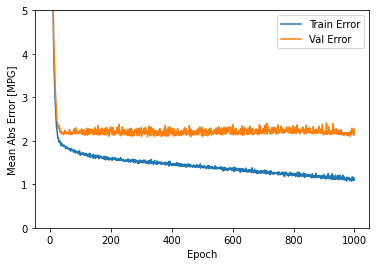

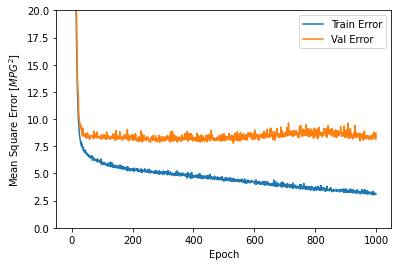

In [24]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

该图表显示在约100个 epochs 之后误差非但没有改进，反而出现恶化。 让我们更新 model.fit 调用，当验证值没有提高上是自动停止训练。 我们将使用一个 EarlyStopping callback 来测试每个 epoch 的训练条件。如果经过一定数量的 epochs 后没有改进，则自动停止训练。
**早期停止是一种防止过度拟合的有效技术。


.........................................................................

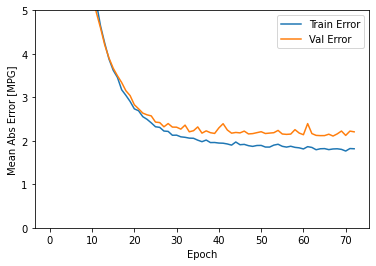

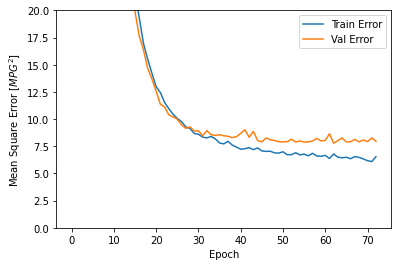

In [25]:
model = build_model()

# patience 值用来检查改进 epochs 的数量
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

如图所示，验证集中的平均的误差通常在 +/- 2 MPG左右。
下面使用测试集来检验模型效果

In [26]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 5.4058 - mae: 1.7451 - mse: 5.4058
Testing set Mean Abs Error:  1.75 MPG


最后，使用测试集中的数据预测 MPG 值:

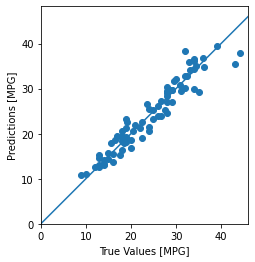

In [27]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


来看下误差分布。

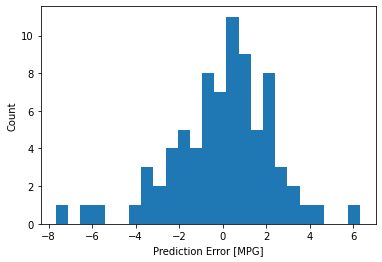

In [28]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

它不是完全的高斯分布，但我们可以推断出，这是因为样本的数量很小所导致的。